In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_rome_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('rome')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/rome_{date}.csv',index=False)
get_listings_rome_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_rome = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_rome)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(rome_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 25489 AirBnb listings.


In [4]:
rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
rome_raw_df_12_12_2020.shape


(28151, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for rome
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_rome = glob.glob('rome/**.csv')
files_rome

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['rome/Rome_2021-01.csv',
 'rome/Rome_2021-02.csv',
 'rome/Rome_2021-03.csv',
 'rome/Rome_2021-07.csv',
 'rome/Rome_2021-06.csv',
 'rome/Rome_2021-04.csv',
 'rome/Rome_2021-10.csv',
 'rome/Rome_2021-08.csv',
 'rome/Rome_2021-09.csv',
 'rome/Rome_2020-12.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

rome_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(rome_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(rome_raw_df_12_12_2020['price'].mean(),2)}.")

rome_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(rome_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_1_9_2021['price'].mean(),2)}.")

rome_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(rome_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_2_8_2021['price'].mean(),2)}.")

rome_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(rome_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_3_4_2021['price'].mean(),2)}.")

rome_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(rome_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_4_9_2021['price'].mean(),2)}.")

#rome_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(rome_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_5_19_2021['price'].mean(),2)}.")

rome_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(rome_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_6_3_2021['price'].mean(),2)}.")

rome_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(rome_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_7_4_2021['price'].mean(),2)}.")

rome_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(rome_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_8_6_2021['price'].mean(),2)}.")

rome_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(rome_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_9_7_2021['price'].mean(),2)}.")

rome_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(rome_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_10_6_2021['price'].mean(),2)}.")

#rome_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/rome_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(rome_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(rome_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 28151 AirBnb listings; the avg price is €108.71.
The 1_9_2021 dataset contains 28024 AirBnb listings; the avg price is €105.14.
The 2_8_2021 dataset contains 27647 AirBnb listings; the avg price is €105.11.
The 3_4_2021 dataset contains 27433 AirBnb listings; the avg price is €109.61.
The 4_9_2021 dataset contains 27518 AirBnb listings; the avg price is €113.53.
The 6_3_2021 dataset contains 27126 AirBnb listings; the avg price is €116.16.
The 7_4_2021 dataset contains 27213 AirBnb listings; the avg price is €120.82.
The 8_6_2021 dataset contains 26877 AirBnb listings; the avg price is €122.9.
The 9_7_2021 dataset contains 26098 AirBnb listings; the avg price is €123.84.
The 10_6_2021 dataset contains 25490 AirBnb listings; the avg price is €127.01.


In [7]:
df_list_rome = [rome_raw_df_12_12_2020, rome_raw_df_1_9_2021, rome_raw_df_2_8_2021,
           rome_raw_df_3_4_2021, rome_raw_df_4_9_2021, rome_raw_df_6_3_2021, rome_raw_df_7_4_2021,
           rome_raw_df_8_6_2021, rome_raw_df_9_7_2021, rome_raw_df_10_6_2021]

dates_rome = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_rome = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_rome = []

def airbnb_parse_rome(df_list, files):
    for file in files_rome:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/rome/rome_{file}.csv")
        print(f"The {file} rome dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_rome(df_list, dates):
    for file in files_rome:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/rome/rome_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_rome.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_rome)

rome_parse = airbnb_parse_rome(df_list_rome, files_rome)


The 2020-12 rome dataset contains 28151 AirBnb listings -- the avg price is €108.71.
The 2021-01 rome dataset contains 28024 AirBnb listings -- the avg price is €105.14.
The 2021-02 rome dataset contains 27647 AirBnb listings -- the avg price is €105.11.
The 2021-03 rome dataset contains 27433 AirBnb listings -- the avg price is €109.61.
The 2021-04 rome dataset contains 27518 AirBnb listings -- the avg price is €113.53.
The 2021-06 rome dataset contains 27126 AirBnb listings -- the avg price is €116.16.
The 2021-07 rome dataset contains 27213 AirBnb listings -- the avg price is €120.82.
The 2021-08 rome dataset contains 26877 AirBnb listings -- the avg price is €122.9.
The 2021-09 rome dataset contains 26098 AirBnb listings -- the avg price is €123.84.
The 2021-10 rome dataset contains 25490 AirBnb listings -- the avg price is €127.01.


In [8]:
rome_summary = airbnb_to_frame_rome(df_list_rome, files_rome)
rome_summary['Date of scrape'] = pd.to_datetime(rome_summary['Date of scrape'])
rome_summary['City'] = 'Rome'

dfi.export(rome_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/airbnb_rome_summary.png")


In [9]:
master_df_rome = pd.concat(df_list_rome)
master_df_rome_unique = master_df_rome.drop_duplicates(subset='id')
master_df_rome_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,21,7,7,2015-05-28,0.10,5,365,NaN,NaN
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,37,1,55,2017-10-31,0.37,3,365,NaN,NaN
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,94,3,17,2018-10-01,0.14,7,365,NaN,NaN
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,90,2,142,2020-01-03,1.21,1,364,NaN,NaN
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,73,2,40,2020-11-22,0.32,2,319,NaN,NaN


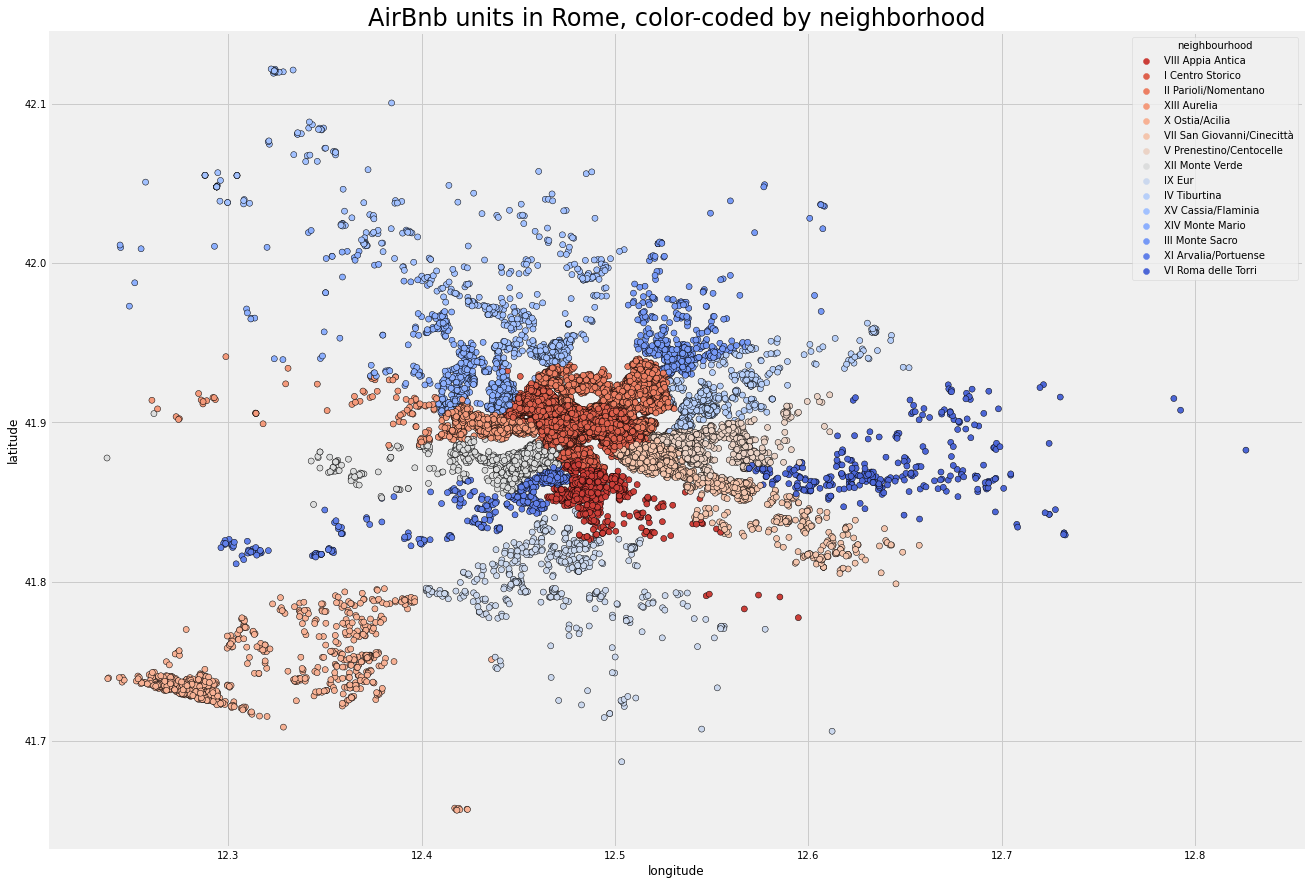

In [10]:
title = 'AirBnb units in Rome, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_rome_unique.longitude, master_df_rome_unique.latitude, hue = master_df_rome_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/airbnb_rome_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([rome_raw_df_10_6_2021,raw_df_rome],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2.0    8506
4.0    6404
3.0    3187
6.0    2219
5.0    1909
1.0    1231
0.0       2
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -68.13120627294651
Coefficients:  [ 13.61894167  18.27904884  -6.17831573   0.28268062   2.41559686
 -11.42118408  14.66382395  50.40879391 -32.34671746]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


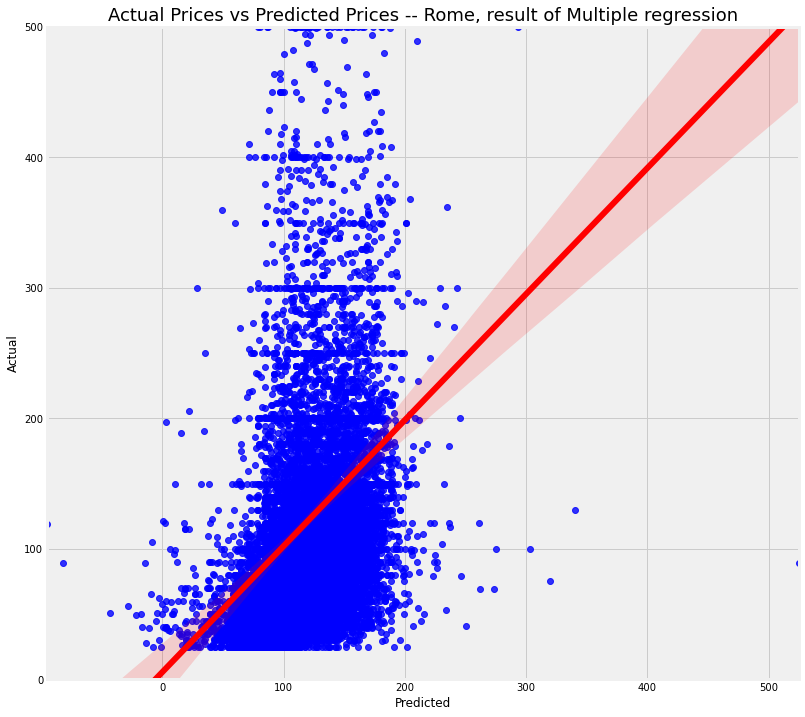

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Rome, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/airbnb_rome_multiple_regression.png')



In [18]:
df_result.shape

(21946, 3)

## The most mispriced [undervalued]

In [19]:
rome_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
rome_mispriced['%'] = (rome_mispriced['Actual']/ rome_mispriced['Predicted'] -1) *100
rome_mispriced_perc = rome_mispriced.sort_values(by=['%'], ascending=True)
rome_mispriced_perc_plot = rome_mispriced_perc.loc[(rome_mispriced_perc['Predicted']>=1) & (rome_mispriced_perc['Diff']>= 1)]
rome_mispriced_perc_plot = rome_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
rome_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
15238,25,201.458374,176.458374,-87.590489
25311,25,190.749855,165.749855,-86.893830
24241,25,169.423708,144.423708,-85.244096
24671,30,195.632303,165.632303,-84.665109
1165,25,161.396310,136.396310,-84.510179


In [20]:

rome_mispriced_1 = raw_df_rome.loc[raw_df_rome.id==827]
rome_mispriced_2 = raw_df_rome.loc[raw_df_rome.id==748]
rome_mispriced_3 = raw_df_rome.loc[raw_df_rome.index==1308]
rome_mispriced_4 = raw_df_rome.loc[raw_df_rome.index==1748]
rome_mispriced_5 = raw_df_rome.loc[raw_df_rome.index==894]

In [20]:
id_array = [15238, 25311, 24241, 24671, 1165]

rome_mispriced_query = raw_df_rome.query('index in @id_array')
rome_mispriced_query = rome_mispriced_query.rename({'index': 'id'}, axis=1)
rome_mispriced_query.shape
#rome_mispriced_query.head(1)

(5, 74)

In [21]:
#rome_mispriced_neg = raw_df_rome.loc[raw_df_rome.index==4119]
rome_mispriced_perc_1 = raw_df_rome.loc[raw_df_rome.id==7125]
rome_mispriced_perc_2 = raw_df_rome.loc[raw_df_rome.id==3679]
rome_mispriced_perc_3 = raw_df_rome.loc[raw_df_rome.id==8267]
rome_mispriced_perc_4 = raw_df_rome.loc[raw_df_rome.id==2483]
rome_mispriced_perc_5 = raw_df_rome.loc[raw_df_rome.id==3449]

In [22]:
rome_mispriced = rome_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
rome_mispriced_1 = rome_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

rome_mispriced_1[:1]
rome_mispriced_1[:2]
rome_mispriced_1[:3]
rome_mispriced_1[:4]
rome_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
1165,1120573,$25.00,3.83,4.33,4.17,4.33,4.83,4.17,NaN,https://www.airbnb.com/rooms/1120573
15238,30503788,$25.00,1.00,1.00,5.00,1.00,5.00,3.00,"Rome, Lazio, Italy",https://www.airbnb.com/rooms/30503788
24241,50586695,$143.00,4.00,4.00,5.00,5.00,5.00,4.00,"Rome, Lazio, Italy",https://www.airbnb.com/rooms/50586695
24671,51280699,$93.00,5.00,5.00,5.00,5.00,5.00,3.00,NaN,https://www.airbnb.com/rooms/51280699
25311,52424323,$45.00,3.00,3.00,4.50,3.50,5.00,3.50,NaN,https://www.airbnb.com/rooms/52424323


In [23]:
dfi.export(rome_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/airbnb_rome_mispriced.png")



## The best score

In [24]:
rome_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
rome_high_value.head(6)

,Actual,Predicted,Diff
19824,89,524.493872,435.493872
20217,130,340.408172,210.408172
10670,75,319.715386,244.715386
13926,100,303.186513,203.186513
23513,500,292.898277,-207.101723
22758,100,275.048184,175.048184


In [25]:
id_array = [19824, 20217, 10670, 13926, 23513]

rome_best_score_query = raw_df_rome.query('index in @id_array')
rome_best_score_query = rome_best_score_query.rename({'index': 'id'}, axis=1)
#rome_best_score_query.head(1)

In [26]:
rome_best_score = rome_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
rome_best_score_1 = rome_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

rome_best_score_1[:1]
rome_best_score_1[:2]
rome_best_score_1[:3]
rome_best_score_1[:4]
rome_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
10670,19960826,$75.00,1.0,1.0,5.0,4.0,5.0,1.0,NaN,https://www.airbnb.com/rooms/19960826
13926,27158477,$100.00,3.0,4.0,4.0,5.0,5.0,4.0,NaN,https://www.airbnb.com/rooms/27158477
19824,40661628,$89.00,NaN,NaN,NaN,NaN,NaN,NaN,"Rome, Lazio, Italy",https://www.airbnb.com/rooms/40661628
20217,41387859,$130.00,1.0,3.0,3.0,1.0,5.0,3.0,NaN,https://www.airbnb.com/rooms/41387859
23513,49577441,$120.00,2.0,1.0,4.0,1.0,5.0,2.0,NaN,https://www.airbnb.com/rooms/49577441


In [27]:
dfi.export(rome_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/rome/airbnb_rome_best_score.png")


